# 1 - Load Data and Perform General EDA

## I -  Import all Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
import scipy.stats as spt
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn import linear_model as sklm
from sklearn import metrics as skme
from sklearn import preprocessing as skpp
from sklearn import pipeline as skpl

## II - Import Data && Show Dimensons

In [2]:
data = pd.read_csv('ecommarce.csv', index_col=0)
data.shape

(500, 8)

## III - Show First and Last 5 entries

In [3]:
data.head(5)

,Email,Address,Credit Card,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,adkv@ota.com,"89280 Mark Lane\nNew John, MN 16131",3544288738428794,35.497268,13.655651,40.577668,4.582621,588.951054
1,gjun@syj.com,"363 Amanda Cliff Apt. 638\nWest Angela, KS 31437",6546228325389133,32.926272,12.109461,38.268959,3.164034,393.204933
2,qjyr@pkk.com,"62008 Adam Lodge\nLake Pamela, NY 30677",4406395951712628314,34.000915,12.330278,38.110597,4.604543,488.547505
3,jkiu@xsb.com,"950 Tami Island\nLake Aimeeview, MT 93614",30334036663133,35.305557,14.717514,37.721283,3.620179,582.852344
4,stvb@niy.com,"08254 Kelly Squares\nNorth Lauren, AR 78382",3582080469154498,34.330673,13.795189,38.536653,4.946308,600.406092


In [383]:
data.tail(5)

,Email,Address,Credit Card,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,xskz@gwj.com,"7083 Wallace Rest\nNew Trevor, NM 70240",30206742023085,34.237660,14.566160,37.417985,4.246573,574.847438
496,awrc@iok.com,"663 Christopher Garden\nLake Carrieberg, PA 70796",6011536844623717,35.702529,12.695736,38.190268,4.076526,530.049004
497,pndt@jyr.com,"1555 Chen Road\nBergerchester, NH 46418",4086276267550896697,33.646777,12.499409,39.332576,5.458264,552.620145
498,zvtz@onj.com,"5568 Robert Station Apt. 030\nTurnerstad, GA 9...",36218092488069,34.322501,13.391423,37.840086,2.836485,457.469510
499,phqb@nlg.com,"424 Mark Junctions\nDarrellchester, TX 09088",5427200269739116,34.715981,13.418808,36.771016,3.235160,498.778642


## IV - calling describe to see general stats of data

In [384]:
data.describe()

,Credit Card,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.706324e+17,34.053194,13.052488,38.060445,4.033462,500.314038
std,1.235588e+18,0.992563,0.994216,1.010489,0.999278,79.314782
min,5.018057e+11,30.532429,9.508152,34.913847,0.769901,257.670582
25%,3.683275e+13,33.341822,12.388153,37.349257,3.430450,446.038277
50%,3.513612e+15,34.082008,12.983231,38.069367,4.033975,499.887875
75%,4.777131e+15,34.711985,13.753850,38.716432,4.626502,550.313828
max,4.959148e+18,37.139662,16.126994,41.005182,7.422689,766.518462


### A - Description of Credit Card

All Values are Distinc

### B - Description of Value 2

## V - Showing Missing Values

In [385]:
data.isnull().sum().sort_values(ascending = False)

Email                   0
Address                 0
Credit Card             0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

There are no missing values

## VI - Scatter Plots

### A - Yearly Amount Spent Vs. Time on Website

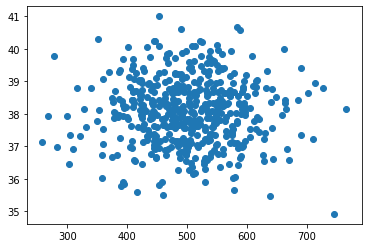

In [386]:
x = data['Yearly Amount Spent']
y = data['Time on Website']
plt.scatter(x, y)
plt.show()

### B - Yearly Maount Spent Vs. Time on App

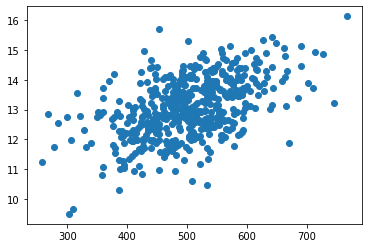

In [387]:
x = data['Yearly Amount Spent']
y = data['Time on App']
plt.scatter(x, y)
plt.show()

### C - Length of Membership Vs. Time on App

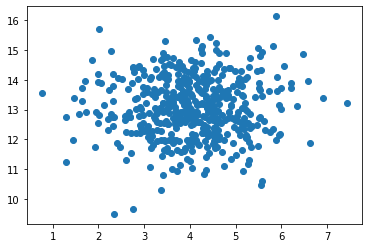

In [388]:
x = data['Length of Membership']
y = data['Time on App']
plt.scatter(x, y)
plt.show()

### D - SNS Pairplot

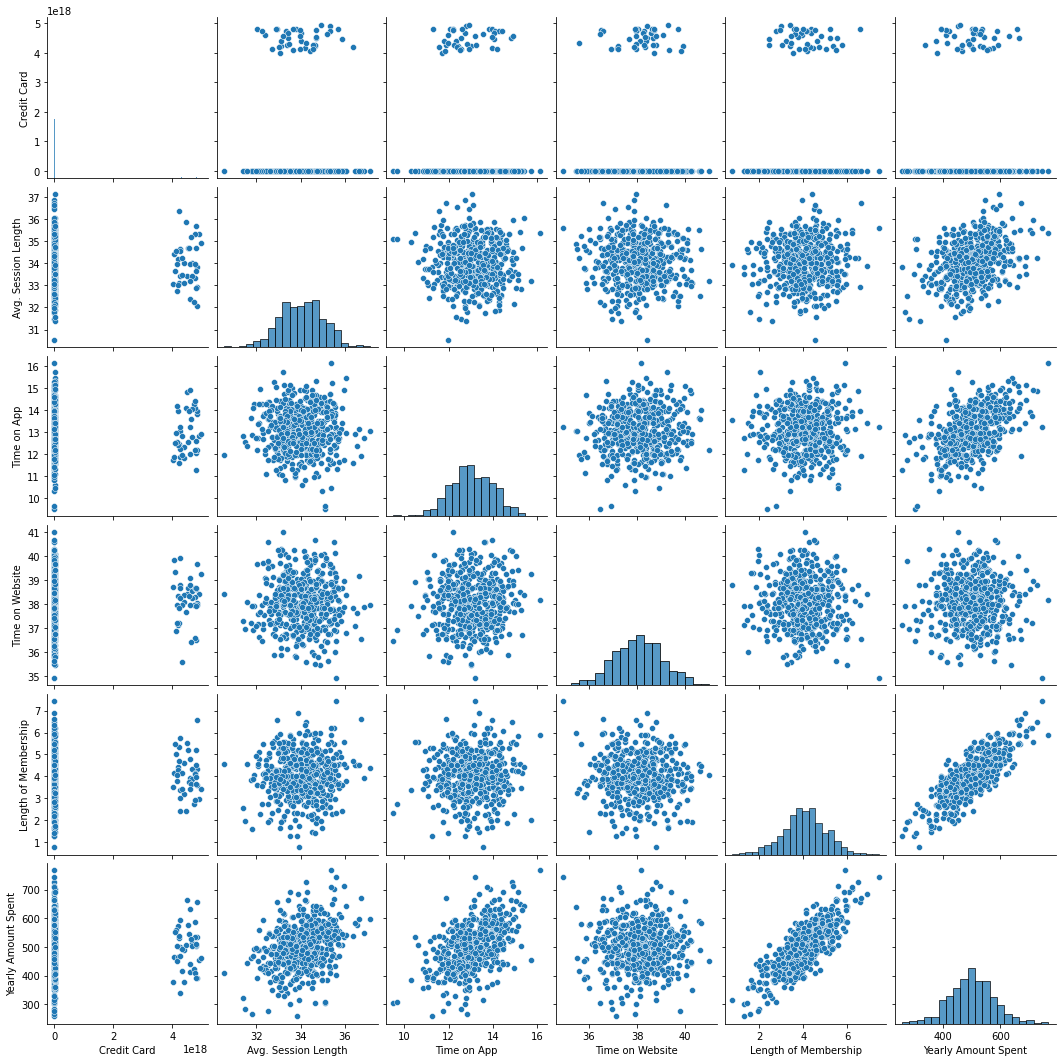

In [389]:
sns.pairplot(data)

### E - SNS Heatmap: Correlation to Yearly Amount Spent

<AxesSubplot:>

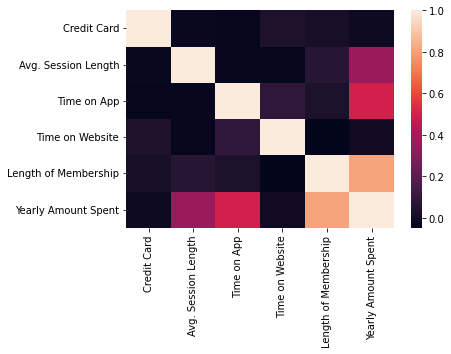

In [390]:
data.columns
correlation = data.corr()
sns.heatmap(correlation)


# 2 - Feature Selection and Pre-Precessing

## Features to Drop:

Email - text feature
Address - Text Feature
Credit Card - all distinc values

In [529]:
data.drop('Email', inplace = True, axis = 1)
data.drop('Address', inplace = True, axis = 1)
data.drop('Credit Card', inplace = True, axis = 1)

# 3 - X/Y and Training/Test Split

## I - Split Data into Training and Testing Sets

In [530]:
y = data['Yearly Amount Spent']
testY, trainY = train_test_split(y, train_size = 0.7, random_state = 101)
data.drop('Yearly Amount Spent', inplace = True, axis = 1)

In [531]:
testX, trainX = train_test_split(data, train_size = 0.7, random_state = 101)

## II - Scale X of Training and Test Sets

In [532]:
scaler = skl.preprocessing.StandardScaler()
scaleTestX = pd.DataFrame(scaler.fit_transform(testX.values), index = testX.index, columns = testX.columns)
scaleTrainX = pd.DataFrame(scaler.fit_transform(trainX.values), index = trainX.index, columns = trainX.columns)

# 4 - Training Linear Model

## I - Train a Linear Model

In [718]:
linModel = sklm.LinearRegression().fit(X = trainX, y = trainY)

## II - Show Coefficients and Intercepts

In [396]:
print('Coefficionts:' , linModel.coef_)
print('Intercepts:' , linModel.intercept_)

Coefficionts: [25.11463945 39.0221878   0.76713598 62.24728656]
Intercepts: -1144.956684528316


## III - Predict Test Data

In [397]:
linPredict = linModel.predict(testX)

## IV - Generate Scatterplot

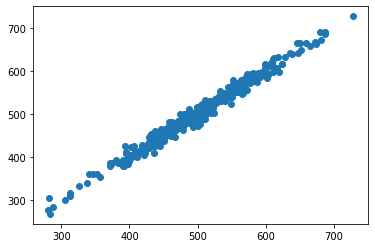

In [398]:
plt.scatter(linPredict, testY)

## V - Print MAE, MSE, RMSE, R^2

In [399]:
print('MAE:', skme.mean_absolute_error(testY, linPredict))
print('MSE:', skme.mean_squared_error(testY, linPredict, squared = True))
print('RMSE:', skme.mean_squared_error(testY, linPredict, squared = False))
print('R^2:', skme.r2_score(testY, linPredict))

MAE: 8.277224105585315
MSE: 109.36337929836623
RMSE: 10.457694741116047
R^2: 0.9813273063676542


## VI - Interpetation

based ot the coefficients time spent on the website has very litte to do with money spent while time spent on the app has a stronger relationship with money spent.
length of membership has the strongest relationship to money spent out of the 4 parameters

# 5 - Normal Equation

## I - Implement Normal Equation & find best_theta Values for Training Data

In [400]:
m = trainX.shape[0]
NTrainX = np.append(trainX, np.ones((m,1)), axis = 1)
NTrainY = trainY.values
NTrainY = NTrainY.reshape((m,1))
theta = np.dot(np.linalg.inv(np.dot(trainX.T, trainX)), np.dot(trainX.T, trainY))
yHat = np.dot(trainX, theta)

## II - Display Theta Values

In [401]:
theta

array([  8.60186593,  36.31546763, -13.60230766,  62.32505165])

## III - Prepare Test Set Before Predicion 

In [402]:
m = testX.shape[0]
NTestX = np.append(testX, np.ones((m,1)), axis = 1)
NTestY = testY.values
NTestY = NTestY.reshape((m,1))

## IV - Perform Prediction for Test Set

In [403]:
theta = np.dot(np.linalg.inv(np.dot(testX.T, testX)), np.dot(testX.T, testY))
yHat = np.dot(testX, theta)

## V - Generate Scatterplot

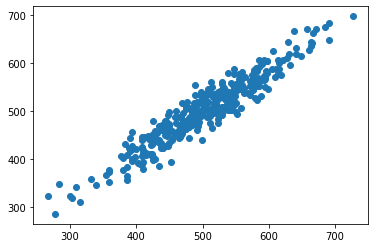

In [404]:
plt.scatter(testY, yHat)
plt.show()


## VI - Print MAE, MSE, RMSE, R^2

In [405]:
print('MAE:', skme.mean_absolute_error(testY, yHat))
print('MSE:', skme.mean_squared_error(testY, yHat, squared = True))
print('RMSE:', skme.mean_squared_error(testY, yHat, squared = False))
print('R^2:', skme.r2_score(testY, yHat))

MAE: 19.16511325560424
MSE: 573.6606462840949
RMSE: 23.95121387913554
R^2: 0.9020532323916913


## VII - Limitations of Normal Equation

one limiton is that the caculations needed are time consuming and expensive, so as the number of entries and features increase this set of operations will get exponontially slower.

# 6 - Batch Gradient Descent

## I - Implement Batch Gradient Decent

In [508]:
m = scaleTrainX.shape[0]
X = scaleTrainX
y = trainY.values.reshape(trainY.shape[0], 1)
X_b = np.c_[np.ones((m, 1)), X] # add x0 = 1 to each instance

In [509]:
cost_list = []
epoch_list = []
predicted_list = []


eta = 0.1  # learning rate
n_iterations = 1000
m = X.shape[0]

theta = np.zeros((5,1))

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - (eta * gradients)
    
    y_predicted = np.dot(theta.T, X_b.T)
    cost = np.mean(np.square(y-y_predicted)) # MSE (Mean Squared Error)
        
    if iteration % 10 == 0:
      cost_list.append(cost)
      epoch_list.append(iteration)
theta_zero = theta

In [510]:
n_epochs = 500
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.zeros((5,1)) # random initialization
for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients
theta_first = theta

## II - Display Theta Values

In [511]:
theta_zero

array([[501.69285572],
       [ 24.20118144],
       [ 42.36025333],
       [  0.83677203],
       [ 64.36759197]])

In [512]:
theta_first

array([[501.62548555],
       [ 24.05416671],
       [ 42.34967651],
       [  0.83531381],
       [ 64.44852392]])

## III - Plot Step Number Vs. Cost

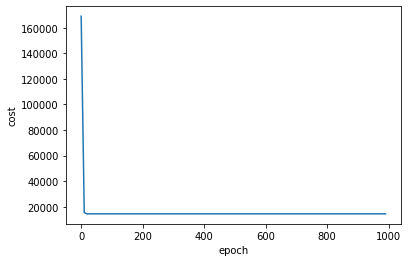

In [411]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

## IV - Perform Prediction on Test Set

In [513]:
cost_list = []
epoch_list = []
predicted_list = []

m = scaleTestX.shape[0]
X = scaleTestX
y = testY.values.reshape(testY.shape[0], 1)
X_b = np.c_[np.ones((m, 1)), X] # add x0 = 1 to each instance

n_epochs = 10000
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
  return t0 / (t + t1)

theta = theta_first
i=0
for epoch in range(n_epochs):
    if i==101:
       i = 0
    random_index = np.random.randint(m)
    #print(random_index)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    #theta = theta - eta * gradients
    i += 1

    y_predicted = np.dot(theta.T, X_b.T)
    cost = np.mean(np.square(y-y_predicted)) # MSE (Mean Squared Error)
        
    if epoch%10==0:
      cost_list.append(cost)
      epoch_list.append(epoch)

theta
y_predicted = np.dot(theta.T, X_b.T)
cost_second = np.mean(np.square(y-y_predicted)) # MSE (Mean Squared Error)

In [514]:
y_predicted = np.dot(theta.T, X_b.T)
y_predicted[0]

cost_second = np.mean(np.square(y-y_predicted)) # MSE (Mean Squared Error)

## V - Generate Scatterplot

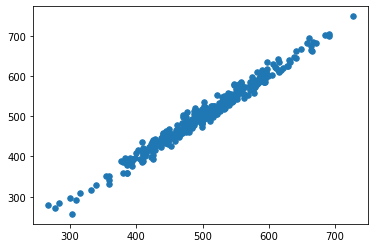

In [515]:
# Plot the output.
plt.scatter(y, y_predicted,s=30,marker='o')
#plt.plot(X.T,y_predicted,c='red')
plt.plot()
plt.show()

## VI - Print MAE, MSE, RMSE, R^2

In [517]:
yNew = y_predicted.reshape(350,1)
print('MAE:', skme.mean_absolute_error(testY, yNew))
print('MSE:', skme.mean_squared_error(testY, yNew, squared = True))
print('RMSE:', skme.mean_squared_error(testY, yNew, squared = False))
print('R^2:', skme.r2_score(testY, yNew))

MAE: 10.03287491937774
MSE: 167.90691362808272
RMSE: 12.957890014507868
R^2: 0.9713315885349862


## VII - How Do Derivitaves Help Gradint Descent

The derivitive is used to help locate the minimum value

## VIII - What are the Benefits and Limitations of Batch Gradient Descent

it is computaionally efficient and prodices stable error and convergences.
a limitaiton is that it dosent always produce the best model

# 7 - Stochastic Gradient Descent

## I - Implement Stochstic Gradiont Descent

In [581]:
m = scaleTrainX.shape[0]
X = scaleTrainX
y = trainY.values.reshape(trainY.shape[0], 1)
X_b = np.c_[np.ones((m, 1)), X] # add x0 = 1 to each instance

In [590]:
SGcost_list = []
SGepoch_list = []
SGpredicted_list = []

def learning_schedule(t):
	return t0 / (t + t1)


eta = 0.1  # learning rate
n_epoch = 500
m = X.shape[0]

theta = np.zeros((5,1))

for epoch in range(n_epoch):
	for i in range(m):
		random_index = np.random.randint(m)
		xi = X_b[random_index:random_index+1]
		yi = y[random_index:random_index+1]
		gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
		eta = learning_schedule(epoch * m + i)
		theta = theta - (eta * gradients)
	
	y_predicted = np.dot(theta.T, X_b.T)
	cost = np.mean(np.square(y-y_predicted)) # MSE (Mean Squared Error)
	SGcost_list.append(cost)
	SGepoch_list.append(epoch)

SGtheta = theta

## II - Diplay Theta Values

In [591]:
SGtheta

array([[501.68783404],
       [ 24.10978668],
       [ 42.39493936],
       [  0.86222032],
       [ 64.42916478]])

## III - Plot Step Number Vs. Cost

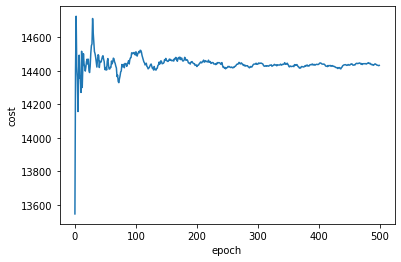

In [589]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(SGepoch_list,SGcost_list)

## IV - Perform Prediction on Test Set

In [592]:
cost_list = []
epoch_list = []
predicted_list = []

m = scaleTestX.shape[0]
X = scaleTestX
y = testY.values.reshape(testY.shape[0], 1)
X_b = np.c_[np.ones((m, 1)), X] # add x0 = 1 to each instance

n_epochs = 10000
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
  return t0 / (t + t1)

theta = SGtheta
i=0
for epoch in range(n_epochs):
    if i==101:
       i = 0
    random_index = np.random.randint(m)
    #print(random_index)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    #theta = theta - eta * gradients
    i += 1

    y_predicted = np.dot(theta.T, X_b.T)
    cost = np.mean(np.square(y-y_predicted)) # MSE (Mean Squared Error)
        
    if epoch%10==0:
      cost_list.append(cost)
      epoch_list.append(epoch)

theta
y_predicted = np.dot(theta.T, X_b.T)
cost_second = np.mean(np.square(y-y_predicted)) # MSE (Mean Squared Error)

In [593]:
y_predicted = np.dot(theta.T, X_b.T)
y_predicted[0]

cost_second = np.mean(np.square(y-y_predicted)) # MSE (Mean Squared Error)

## V - Generate Scatter Plot

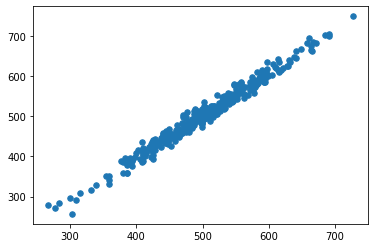

In [594]:
# Plot the output.
plt.scatter(y, y_predicted,s=30,marker='o')
#plt.plot(X.T,y_predicted,c='red')
plt.plot()
plt.show()

## VI - Print MAE, MSE, RMSE, R^2

In [595]:
yNew = y_predicted.reshape(350,1)
print('MAE:', skme.mean_absolute_error(testY, yNew))
print('MSE:', skme.mean_squared_error(testY, yNew, squared = True))
print('RMSE:', skme.mean_squared_error(testY, yNew, squared = False))
print('R^2:', skme.r2_score(testY, yNew))

MAE: 10.04430400840522
MSE: 168.33275760099738
RMSE: 12.974311449976733
R^2: 0.9712588799730121


## VII - Benefits and Limitations of Stochastic Gradient Descent

Since only 1 example is considered at a time it is very space and time efficient, especcially for large datasets

since it takes random steps it may take longer to converge

# 8 - SGDRegressor 

## I - Train Model with SGDRegressor

In [706]:
X = scaleTrainX
y = trainY

In [707]:
sgd_reg = sklm.SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

## II - Display Theta Values

In [708]:
sgd_reg.intercept_, sgd_reg.coef_

(array([501.7827263]),
 array([23.88781469, 42.6306961 ,  1.3927907 , 64.40631847]))

## III - Perform Prediciton on Test Set

In [712]:
predict = sgd_reg.predict(scaleTestX)

## IV - Generate Scatter Plot

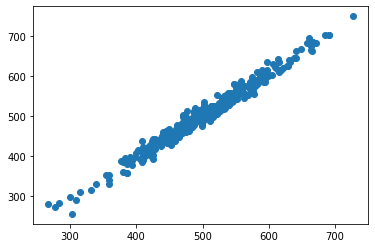

In [713]:
plt.scatter(testY, predict)

## V - Print MAE, MSE, RMSE, R^2

In [714]:
print('MAE:', skme.mean_absolute_error(testY, predict))
print('MSE:', skme.mean_squared_error(testY, predict, squared = True))
print('RMSE:', skme.mean_squared_error(testY, predict, squared = False))
print('R^2:', skme.r2_score(testY, predict))

MAE: 10.203986557600974
MSE: 173.75988074406914
RMSE: 13.18180111912136
R^2: 0.9703322534513579


# 9 - Mini-Batch Gradient Descent

## I - How can Mini-Batch overcome the limitaitons of Batch Gradient Descent and SGD

by using batches you can reduce the random jumping cauled by SGD speeding up computation.

by using small batches you speed up the computation and reduce the memory usage

# 10 - Polynomial of 2nd Degree

## I - Use SKLearn Plynomial Feature wih degree = 2

In [749]:
polyFeatures = skpp.PolynomialFeatures(2, include_bias = False)
polyTrainX = polyFeatures.fit_transform(trainX)
polyTestX = polyFeatures.fit_transform(testX)

## II - use LinearRegression on new features

In [750]:
polyModel = sklm.LinearRegression().fit(X = polyTrainX, y = trainY)

## III - Perform Prediciton on Test Set

In [752]:
polyPredict = polyModel.predict(polyTestX)

## IV - Generate Scatter Plot

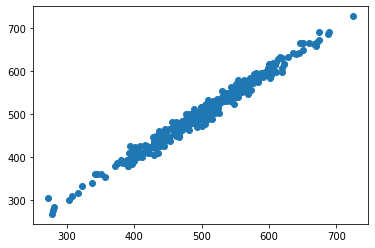

In [753]:
plt.scatter(polyPredict, testY)

## V - Print MAE, MSE, RMSE, R^2

In [741]:
print('MAE:', skme.mean_absolute_error(testY, polyPredict))
print('MSE:', skme.mean_squared_error(testY, polyPredict, squared = True))
print('RMSE:', skme.mean_squared_error(testY, polyPredict, squared = False))
print('R^2:', skme.r2_score(testY, polyPredict))

MAE: 8.397399341604848
MSE: 113.41049003261902
RMSE: 10.649436136839313
R^2: 0.9806363030416624


# 11 - Polynomials of the 3rd Degree

## I - Use SKLearn Plynomial Feature wih degree = 3

In [755]:
polyFeatures = skpp.PolynomialFeatures(3, include_bias = False)
polyTrainX = polyFeatures.fit_transform(trainX)
polyTestX = polyFeatures.fit_transform(testX)

## II - use LinearRegression on new feaures

In [756]:
polyModel = sklm.LinearRegression().fit(X = polyTrainX, y = trainY)

## III - Perform Prediction on Test Set

In [757]:
polyPredict = polyModel.predict(polyTestX)

## IV - Generate Scatter Plot

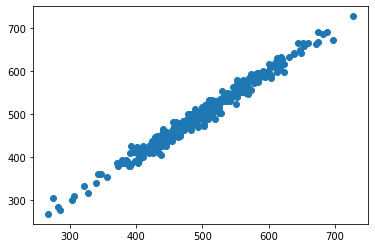

In [758]:
plt.scatter(polyPredict, testY)

## V - Print MAE, MSE, RMSE, R^2

In [759]:
print('MAE:', skme.mean_absolute_error(testY, polyPredict))
print('MSE:', skme.mean_squared_error(testY, polyPredict, squared = True))
print('RMSE:', skme.mean_squared_error(testY, polyPredict, squared = False))
print('R^2:', skme.r2_score(testY, polyPredict))

MAE: 8.712536647065455
MSE: 122.80231666916744
RMSE: 11.081620669792278
R^2: 0.9790327433989603


# 12 - Learning Curve

## I - Generate Learning Curve With LinearRegression

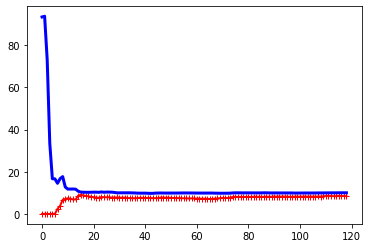

In [775]:
def plot_learning_curve(model, X, y):
	X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
	train_errors, val_errors = [], []
	for m in range(1, len(X_train)):
		model.fit(X_train[:m], y_train[:m])
		y_train_predict = model.predict(X_train[:m])
		y_val_predict = model.predict(X_val)
		train_errors.append(skme.mean_squared_error(y_train[:m], y_train_predict))
		val_errors.append(skme.mean_squared_error(y_val, y_val_predict))
	plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2)
	plt.plot(np.sqrt(val_errors), "b-", linewidth = 3)

linModel = sklm.LinearRegression()
plot_learning_curve(linModel, trainX, trainY)

## II - Generate Learning Curve with Ploynomial Regression on Degree 5

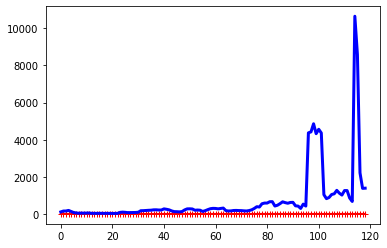

In [774]:
poly_reg = skpl.Pipeline([
	("poly_features", skpp.PolynomialFeatures(5, include_bias = False)),
	("lin_reg", sklm.LinearRegression())
])

plot_learning_curve(poly_reg, trainX, trainY)

## III - Interprete Results

# 13 - Regularization

## I - Explan the Purpose of Regularization

the purpose of regulizationis to reduce the possibility of overfitting

# 14 - Ridge Regression

## I - Use Ridge Regression with Polynomial Degree of 3

In [776]:
ridgeReg = sklm.Ridge(alpha = 1, solver = 'cholesky')
ridgeReg.fit(trainX, trainY)

Ridge(alpha=1, solver='cholesky')

## II - Perform Prediction on Test Set

In [777]:
ridgePredict = ridgeReg.predict(testX)

## III - Generate Scatter Plot

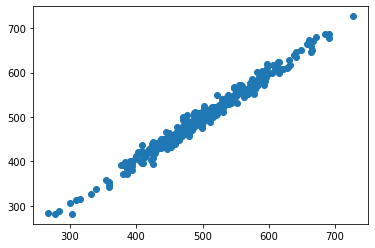

In [778]:
plt.scatter(testY, ridgePredict)

## IV - Print MAE, MSE, RMSE, R^2

In [779]:
print('MAE:', skme.mean_absolute_error(testY, ridgePredict))
print('MSE:', skme.mean_squared_error(testY, ridgePredict, squared = True))
print('RMSE:', skme.mean_squared_error(testY, ridgePredict, squared = False))
print('R^2:', skme.r2_score(testY, ridgePredict))

MAE: 8.258713049357823
MSE: 108.84824928083452
RMSE: 10.433036436284238
R^2: 0.981415259620927


# 15 - SGDRegressor for Ridge

## I - use SGDReggresor for Ridge Regression

In [794]:
sgd_ridge = sklm.SGDRegressor(penalty = "l2")
sgd_ridge.fit(scaleTrainX, trainY.ravel())

SGDRegressor()

## II - Perform Prediction on Test Set

In [795]:
sgdRidgePredict = sgd_ridge.predict(scaleTestX)

## III - Generate Scatter Plot

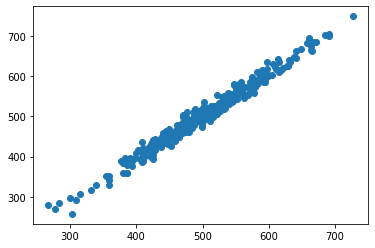

In [796]:
plt.scatter(testY, sgdRidgePredict)

## IV - Print MAE, MSE, RMSE, R^2

In [797]:
print('MAE:', skme.mean_absolute_error(testY, sgdRidgePredict))
print('MSE:', skme.mean_squared_error(testY, sgdRidgePredict, squared = True))
print('RMSE:', skme.mean_squared_error(testY, sgdRidgePredict, squared = False))
print('R^2:', skme.r2_score(testY, sgdRidgePredict))

MAE: 9.99774886082071
MSE: 166.7164259856496
RMSE: 12.91187151367491
R^2: 0.9715348522889308


# 16 - Lasso Regression

## I - Use SKLearn Lasso

In [798]:
lassoReg = sklm.Lasso(alpha = 0.1)
lassoReg.fit(trainX, trainY)

Lasso(alpha=0.1)

## II - Perform Prediction on Test Set

In [799]:
lassoPredict = lassoReg.predict(testX)

## III - Generate Scatter Plot

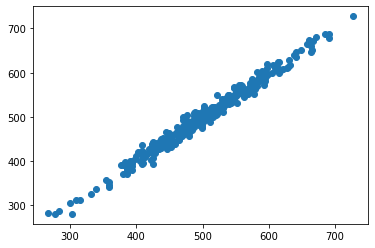

In [800]:
plt.scatter(testY, lassoPredict)

## IV - Print MAE, MSE, RMSE, R^2

In [801]:
print('MAE:', skme.mean_absolute_error(testY, lassoPredict))
print('MSE:', skme.mean_squared_error(testY, lassoPredict, squared = True))
print('RMSE:', skme.mean_squared_error(testY, lassoPredict, squared = False))
print('R^2:', skme.r2_score(testY, lassoPredict))

MAE: 8.28018187336804
MSE: 109.25614867866871
RMSE: 10.452566607234258
R^2: 0.9813456149141024


## V - How does Lasso perform after Regularization. How does this affect the thetas?

the features with the least effect will end up with a 0 theta

# 17 - Elastic Net

## I - Use ElasticNet

In [802]:
elasticReg = sklm.ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elasticReg.fit(trainX, trainY)

ElasticNet(alpha=0.1)

## II - Perform Prediction on Test Set

In [803]:
elasticPredict = elasticReg.predict(testX)

## III - Generate Scatter Plot

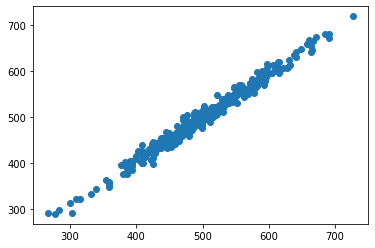

In [804]:
plt.scatter(testY, elasticPredict)

## IV - Print MAE, MSE, RMSE, R^2

In [805]:
print('MAE:', skme.mean_absolute_error(testY, elasticPredict))
print('MSE:', skme.mean_squared_error(testY, elasticPredict, squared = True))
print('RMSE:', skme.mean_squared_error(testY, elasticPredict, squared = False))
print('R^2:', skme.r2_score(testY, elasticPredict))

MAE: 8.501431763934967
MSE: 114.38140115575678
RMSE: 10.69492408368366
R^2: 0.9804705297630484


## V - How dose ElasticNet differ fom Lasso and Ridge. Perform Regularivation, how does that affect the results

Elastic net eliminates some usless features much like Ridge, but works better with large number of features in contrast with Lasso

# 18 - Bonus Question